In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('cats_and_dogs_small_1.h5')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
img_path = "C:/Users/ikram/Desktop/CNN_working/cat.jpg"

In [5]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [6]:
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


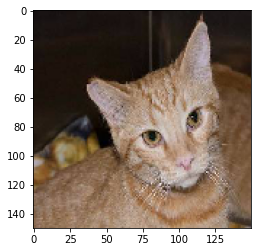

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [8]:
from keras import models

In [9]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [10]:
activations = activation_model.predict(img_tensor)

In [11]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


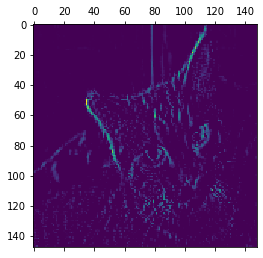

In [12]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

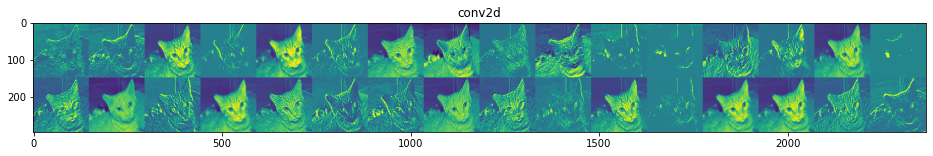

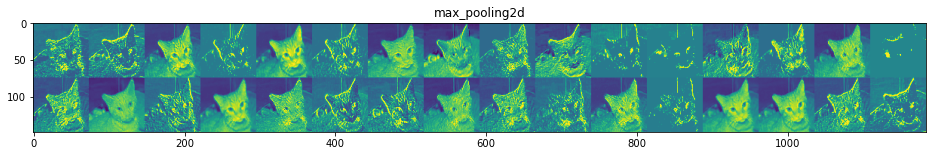

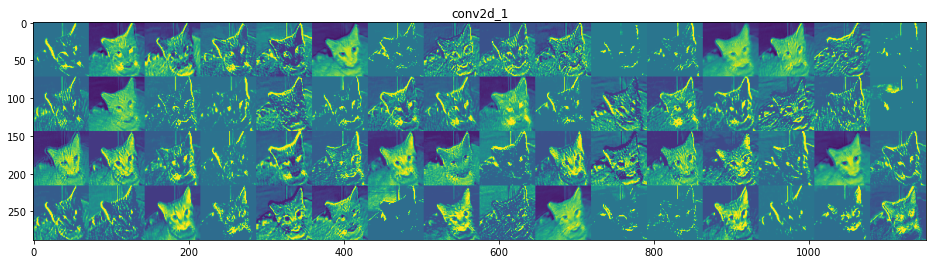

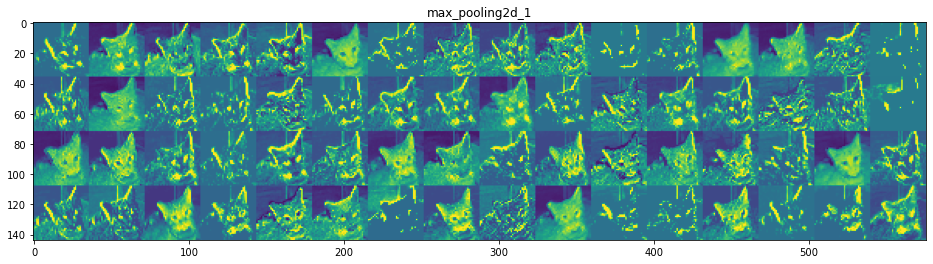

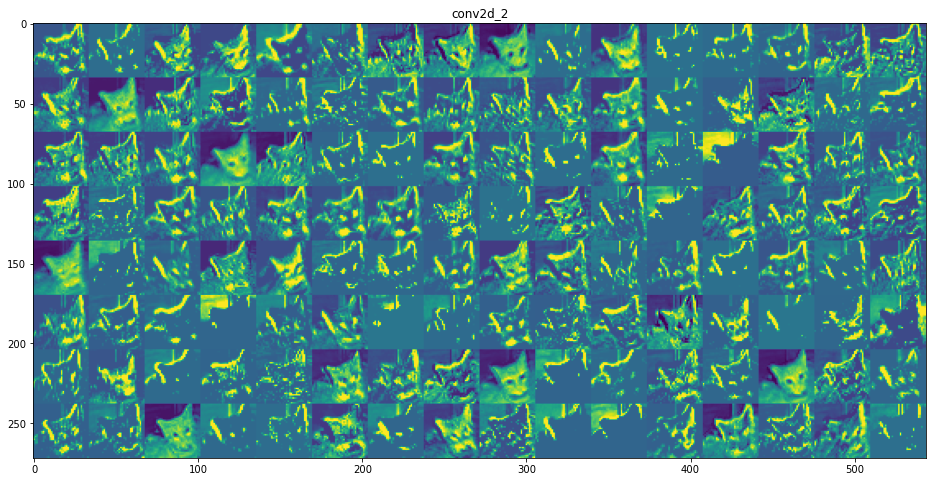

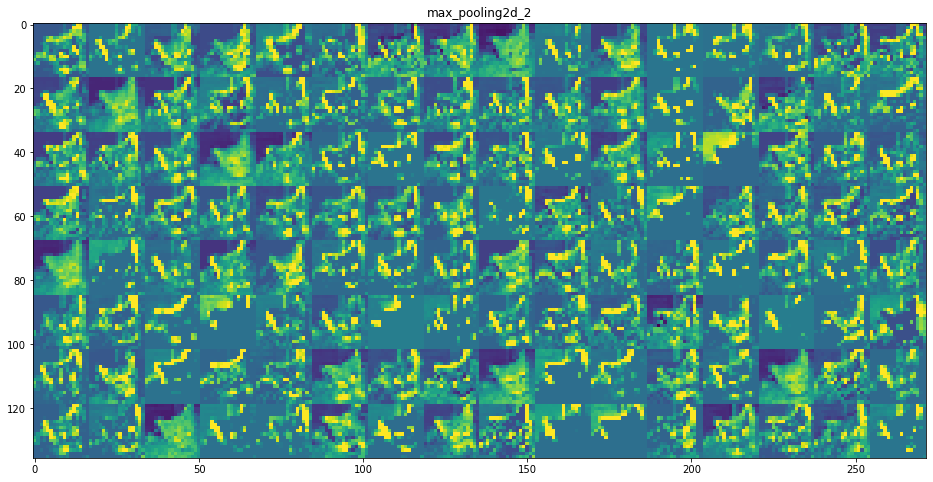

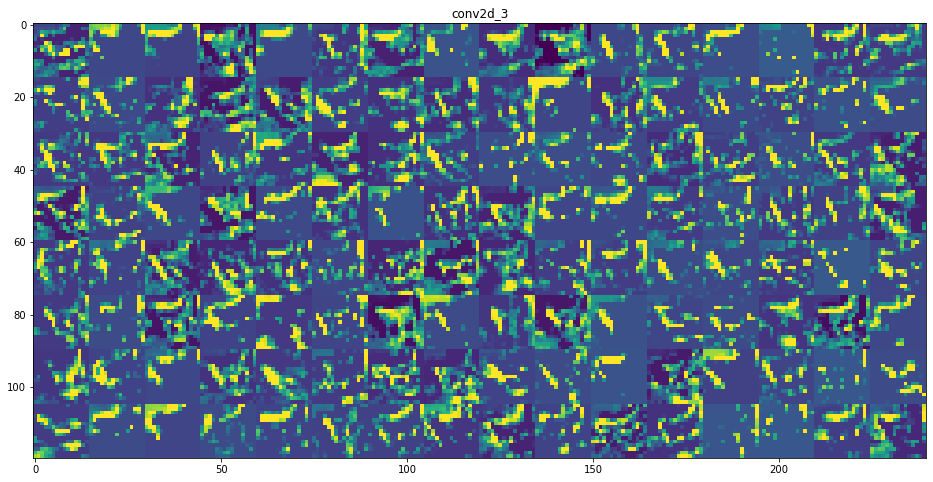

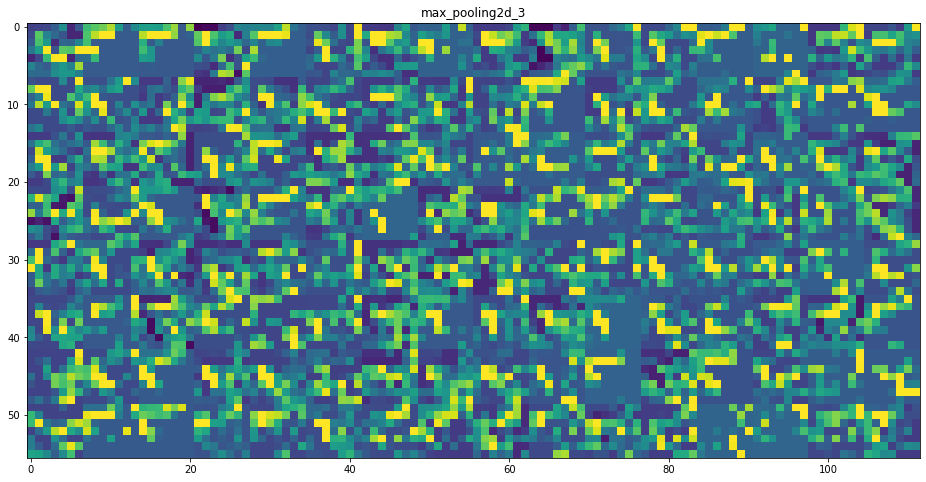

In [13]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [25]:
model1 = load_model('VGG16.h5')

In [26]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = 

In [14]:
from keras.applications import VGG16

In [15]:
from keras import backend as K

In [16]:
model = VGG16(weights="imagenet",
             include_top=False)

In [17]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [18]:
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss =K.mean(layer_output[:, :, :, filter_index])

ValueError: Tensor("Const:0", shape=(3,), dtype=int32) must be from the same graph as Tensor("strided_slice:0", shape=(None, None, None), dtype=float32) (graphs are <tensorflow.python.framework.ops.Graph object at 0x0000023322476D60> and FuncGraph(name=keras_graph, id=2418641758576)).

In [37]:
disable_eager_execution()

In [38]:
grads = K.gradients(loss, model.input)[0]

In [39]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

ValueError: Tensor("Const:0", shape=(4,), dtype=int32) must be from the same graph as Tensor("Square:0", shape=(None, None, None, 3), dtype=float32) (graphs are <tensorflow.python.framework.ops.Graph object at 0x00000183ABDC5DF0> and FuncGraph(name=keras_graph, id=1665035766272)).

In [29]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block1_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]

In [30]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [31]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [32]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [33]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  
  input_img_data += grads_value * step

In [34]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  x += 0.5
  x = np.clip(x, 0, 1)
  
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [35]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

In [36]:
import matplotlib.pyplot as plt


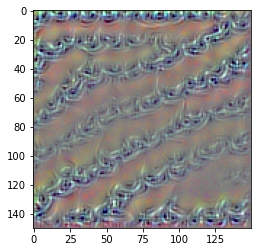

In [41]:
plt.imshow(generate_pattern('block3_conv3', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


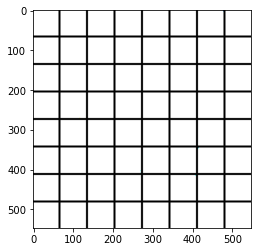

In [27]:
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img

plt.imshow(results)

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K


model1 = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

ValueError: Tensor("Const:0", shape=(3,), dtype=int32) must be from the same graph as Tensor("strided_slice_9:0", shape=(None, 56, 56), dtype=float32) (graphs are <tensorflow.python.framework.ops.Graph object at 0x00000248C19EA760> and FuncGraph(name=keras_graph, id=2511474735520)).

In [24]:
import tensorflow as tf

In [36]:
grads = K.gradients(loss, model.input)[0]

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

In [4]:
from tensorflow.keras.applications import VGG16

In [5]:
model = VGG16(weights='imagenet')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 64373286793e3c8b2b4e3219cbf3544b so we will re-download the data.
553467904/553467096 [==============================] - 1157s 2us/step


In [6]:
model.save('VGG16.h5')

In [7]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = 'C:/Users/ikram/Downloads/12.jpg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

In [8]:
preds = model.predict(x)

In [9]:
print('Predicted: ', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 3us/step
Predicted:  [('n02504458', 'African_elephant', 0.8888015), ('n01871265', 'tusker', 0.10223347), ('n02504013', 'Indian_elephant', 0.008635196)]


In [11]:
np.argmax(preds[0])

386

In [16]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')

In [14]:
from keras import backend as K

In [28]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()
K.clear_session()

In [29]:
african_e66lephant_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

ValueError: Tensor Tensor("Mean_3:0", shape=(512,), dtype=float32) is not an element of this graph.

In [22]:
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

In [24]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [30]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

ValueError: Tensor Tensor("Mean_1:0", shape=(512,), dtype=float32) is not an element of this graph.

In [23]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)

ValueError: Tensor Tensor("Mean:0", shape=(512,), dtype=float32) is not an element of this graph.